In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import seaborn as sns
import statistics
from sklearn.preprocessing import scale
from sklearn.preprocessing import MaxAbsScaler

In [2]:
mutants = pd.read_csv('data/cleank8.csv', header=None, low_memory=False)

In [3]:
mutants.head()

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,a119e_r283k_a353v,inactive
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,c135y,inactive
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,c135y_e285m,inactive
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,c135y_e285v,inactive


In [4]:
nametags = mutants.pop(5408).astype(str)
print(nametags)

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: 5408, Length: 16591, dtype: object


In [5]:
target = mutants.pop(5409).astype(str)
target = target.replace({'inactive': False, 'active': True})
print(target)

0        False
1        False
2        False
3        False
4        False
         ...  
16586     True
16587     True
16588    False
16589    False
16590     True
Name: 5409, Length: 16591, dtype: bool


In [6]:
mutants.head()

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,-0.015,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.007,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,-0.016,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,-0.028,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.027,-0.011,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013


In [7]:
desc = mutants.describe()
print(desc.index)
desc.head()

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
count,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,...,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000
mean,-0.201763,-0.004898,-0.011593,-0.024726,-0.019615,-0.077004,0.222236,0.011294,0.009716,0.009895,...,-0.009736,0.002827,0.004689,0.011400,0.018242,0.001767,-0.011238,0.001415,0.011424,-0.000615
std,0.415089,0.362149,0.244942,0.256497,0.195207,0.539291,1.991421,0.127339,0.210814,0.339393,...,0.011281,0.020840,0.018827,0.024245,0.013061,0.033117,0.009405,0.015348,0.009534,0.022943
min,-6.085000,-7.409000,-4.410000,-3.419000,-3.270000,-2.241000,-0.512000,-0.685000,-0.684000,-0.534000,...,-0.392000,-0.167000,-0.233000,-0.531000,-0.075000,-0.204000,-0.522000,-0.042000,-0.112000,-0.194000
25%,-0.169000,-0.024000,-0.014000,-0.040000,-0.043000,-0.113000,0.006000,0.002000,-0.003000,-0.017000,...,-0.014000,-0.008000,-0.007000,-0.002000,0.011000,-0.019000,-0.012000,-0.006000,0.009000,-0.014000


In [8]:
descT = desc.T
descT.head()

,count,mean,std,min,25%,50%,75%,max
0,16591.0,-0.201763,0.415089,-6.085,-0.169,-0.162,-0.154,2.323
1,16591.0,-0.004898,0.362149,-7.409,-0.024,-0.010,0.005,4.552
2,16591.0,-0.011593,0.244942,-4.410,-0.014,-0.010,-0.003,2.872
3,16591.0,-0.024726,0.256497,-3.419,-0.040,-0.034,-0.012,17.831
4,16591.0,-0.019615,0.195207,-3.270,-0.043,-0.023,-0.001,4.571


The minimum standard deviation for the original features is 0.006618814893812356
The maximum standard deviation for the original features is 77.3480716547277


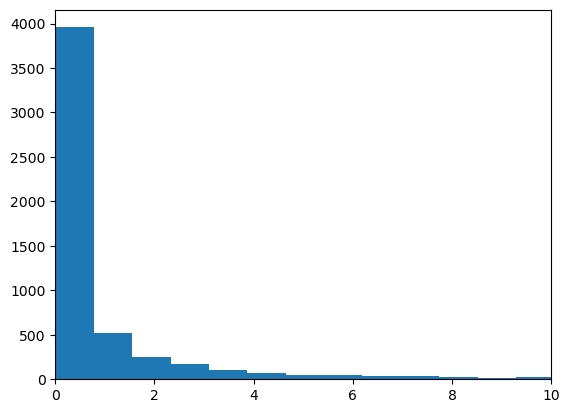

In [9]:
std_min = descT['std'].min()
print("The minimum standard deviation for the original features is {}".format(std_min))

std_max = descT['std'].max()
print("The maximum standard deviation for the original features is {}".format(std_max))

# plot a histogram of the descT['std'] values so that we can see the distribution
#sns.histplot(data=descT, x="std")
_ = plt.hist(x=descT['std'], bins=100)
_ = plt.xlim([0, 10])

In [10]:
descT.describe()

,count,mean,std,min,25%,50%,75%,max
count,5408.0,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000
mean,16591.0,0.163703,1.188337,-10.564887,-0.275089,0.087606,0.564449,18.131332
std,0.0,3.482811,3.029671,16.820849,3.499720,3.806637,3.824114,31.861964
min,16591.0,-87.251644,0.006619,-255.926167,-91.454000,-86.965000,-82.645000,0.000000
25%,16591.0,-0.030156,0.148570,-11.160500,-0.061000,-0.025000,-0.004000,1.606750
50%,16591.0,0.013918,0.297502,-4.737000,-0.011000,0.011000,0.033000,4.345500
75%,16591.0,0.148052,0.892012,-2.339750,0.023000,0.135000,0.282000,19.545750
max,16591.0,57.955999,77.348072,-0.032000,47.499500,62.450000,71.864000,281.988000


In [11]:
logical = descT['std'] < 1.0
low_var_cols = list(descT.index[logical])

In [12]:
len(low_var_cols)

4149

In [13]:
hv_mutants = mutants.drop(low_var_cols, axis=1)
hv_mutants.head()

,6,10,11,25,106,288,293,294,300,301,...,4812,4813,4814,4815,4816,4817,4820,4821,4822,4825
0,0.025,-0.030,-0.050,-0.031,-0.144053,-4.485,-4.222,-4.109,-0.033,-3.665,...,-0.191500,0.033067,-2.246,-1.037,24.298,48.519,1.971567,0.120300,0.582294,-0.381114
1,0.013,-0.007,-0.010,-0.019,-0.172632,-4.489,-4.238,-4.111,-0.057,-3.725,...,0.873722,-1.028600,-1.808,3.705,21.268,62.454,1.771478,-0.112233,0.537647,0.615029
2,0.038,-0.032,-0.043,-0.036,-0.158158,-4.485,-4.224,-4.107,-0.031,-3.643,...,-0.304639,-0.503633,-2.324,-0.533,24.274,49.118,1.876060,0.648200,0.396000,-0.350229
3,0.071,-0.044,-0.097,-0.058,-0.038211,-4.484,-4.219,-4.106,-0.145,-3.998,...,-0.430917,0.218600,-2.305,-2.126,16.750,56.411,2.753896,0.537033,0.455118,-3.266400
4,0.005,0.006,-0.002,-0.011,-0.178263,-4.490,-4.239,-4.110,-0.060,-3.741,...,0.453944,-1.339100,-2.378,4.155,20.821,61.475,0.856254,-2.289233,0.309824,1.177314


In [14]:
mas = MaxAbsScaler()
mas_mutants = pd.DataFrame(mas.fit_transform(mutants))
mas_mutants.head()

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,-0.026459,-0.001890,0.000454,-0.002019,-0.007219,-0.004881,0.001252,0.000791,0.000000,-0.001840,...,-0.038265,0.025641,0.055794,0.039548,0.046189,0.078431,-0.021073,0.005445,0.064516,-0.036082
1,-0.025965,-0.000270,-0.002721,-0.001402,-0.002625,-0.005563,0.000651,0.000791,0.000000,-0.000245,...,-0.017857,0.008547,-0.034335,0.013183,0.034642,-0.039216,-0.021073,-0.007260,0.083871,0.025773
2,-0.027773,-0.003374,-0.002268,-0.002299,-0.009845,-0.003621,0.001903,0.002214,0.001049,-0.001717,...,-0.040816,0.081197,0.042918,0.047081,0.057737,0.102941,-0.022989,0.010889,0.103226,-0.092784
3,-0.030074,-0.006884,-0.005215,-0.004318,-0.020127,-0.000787,0.003556,0.004271,0.002623,-0.002330,...,-0.071429,0.217949,0.051502,0.094162,0.087760,0.250000,-0.028736,0.030853,0.174194,-0.252577
4,-0.025308,0.000675,-0.002494,-0.000729,-0.000438,-0.006036,0.000250,0.000316,-0.000393,0.000245,...,0.068878,-0.047009,0.051502,0.016949,0.006928,-0.004902,0.003831,-0.010889,0.058065,0.067010


The minimum standard deviation for the Max Abs Scaled features is 0.007958482344045307
The maximum standard deviation for the Max Abs Scaled features is 0.5023636937099442


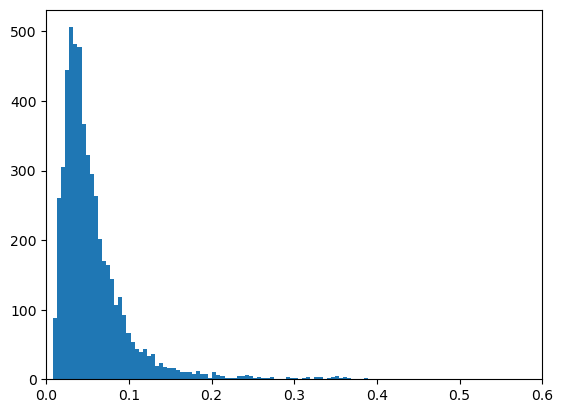

In [15]:
mas_desc = mas_mutants.describe()
mas_descT = mas_desc.T

std_min = mas_descT['std'].min()
print("The minimum standard deviation for the Max Abs Scaled features is {}".format(std_min))

std_max = mas_descT['std'].max()
print("The maximum standard deviation for the Max Abs Scaled features is {}".format(std_max))

# plot a histogram of the mas_descT['std'] values so that we can see the distribution
_ = plt.hist(x=mas_descT['std'], bins=100)
_ = plt.xlim([0, 0.6])

In [16]:
logical = mas_descT['std'] < 0.1
mas_low_var_cols = list(mas_descT.index[logical])
len(mas_low_var_cols)

4853

In [17]:
MAS_mutants = mutants.drop(mas_low_var_cols, axis=1)
MAS_mutants.head()

,25,86,106,131,288,292,293,294,297,298,...,5278,5282,5283,5330,5331,5369,5377,5387,5403,5407
0,-0.031,-0.024,-0.144053,-0.021,-4.485,-0.694,-4.222,-4.109,0.003,-0.004,...,0.041,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,0.016,-0.007
1,-0.019,0.006,-0.172632,-0.038,-4.489,-0.689,-4.238,-4.111,0.006,-0.002,...,0.022,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,-0.008,0.005
2,-0.036,-0.056,-0.158158,-0.033,-4.485,-0.696,-4.224,-4.107,-0.012,-0.017,...,0.047,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,0.021,-0.018
3,-0.058,-0.116,-0.038211,-0.039,-4.484,-0.701,-4.219,-4.106,-0.038,-0.043,...,0.073,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,0.051,-0.049
4,-0.011,0.012,-0.178263,-0.037,-4.490,-0.688,-4.239,-4.110,0.011,0.004,...,0.015,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,-0.001,0.013


In [18]:
MAS_list = list(MAS_mutants.columns) # check the remaining column names
MAS_len = len(MAS_list)

In [19]:
print(sum(MAS_mutants.columns <= 4826)) # number of remaining 2D features
print(sum(MAS_mutants.columns > 4826)) # number of remaining 3D features

513
42


In [20]:
MAS_mutants_2D = MAS_mutants[MAS_mutants.columns[0:513]]

MAS_mutants_3D = MAS_mutants[MAS_mutants.columns[513:]]

In [21]:
MAS_mutants_2D.head()


,25,86,106,131,288,292,293,294,297,298,...,4802,4804,4809,4813,4814,4816,4817,4821,4822,4824
0,-0.031,-0.024,-0.144053,-0.021,-4.485,-0.694,-4.222,-4.109,0.003,-0.004,...,-18.015,-14.342,-1.213727,0.033067,-2.246,24.298,48.519,0.120300,0.582294,0.227375
1,-0.019,0.006,-0.172632,-0.038,-4.489,-0.689,-4.238,-4.111,0.006,-0.002,...,-9.978,4.115,-0.619045,-1.028600,-1.808,21.268,62.454,-0.112233,0.537647,0.278125
2,-0.036,-0.056,-0.158158,-0.033,-4.485,-0.696,-4.224,-4.107,-0.012,-0.017,...,-17.386,-11.706,0.489000,-0.503633,-2.324,24.274,49.118,0.648200,0.396000,0.027750
3,-0.058,-0.116,-0.038211,-0.039,-4.484,-0.701,-4.219,-4.106,-0.038,-0.043,...,-23.006,-23.103,-1.607500,0.218600,-2.305,16.750,56.411,0.537033,0.455118,0.050625
4,-0.011,0.012,-0.178263,-0.037,-4.490,-0.688,-4.239,-4.110,0.011,0.004,...,-9.191,2.702,-1.240091,-1.339100,-2.378,20.821,61.475,-2.289233,0.309824,-0.122750


In [ ]:
lin_file = lin_df.to_csv('lin_filtered.csv', header=cols)